In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## **Funciones Adicionales**

In [ ]:
def plot2in1(title, serie1, serie2, xlabel, ylabel, x, y1,y2):
  plt.figure(figsize=(8,7))
  plt.plot(x, y1, "-o", color='blue',label=serie1)
  plt.plot(x, y2, "-o", color='red',label=serie2)
  plt.title(title, fontsize=16)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

In [ ]:
def plot_2(title, subtitle1, subtitle2, xlabel, ylabel, x,y1,y2):
  fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(15,7))

  axs[0].set_title(subtitle1)
  axs[0].plot(x, y1, "-o", color='blue')
  axs[0].set_xlabel(xlabel)
  axs[0].set_ylabel(ylabel)

  axs[1].set_title(subtitle2)
  axs[1].plot(x,y2, "-o", color='red')
  axs[1].set_xlabel(xlabel)
  axs[1].set_ylabel(ylabel)


  fig.suptitle(title, fontsize=16)
  plt.show()

In [ ]:
def Normalizar_Datos2(data):
  y1 = data.iloc[:,-2]
  y2 = data.iloc[:,-1]
  data = data.iloc[:,:-2]
  data = (data - data.mean(axis=0))/data.std(axis=0)
  col = len(data.columns)-1
  data.insert(col+1, "y1", y1, True) 
  data.insert(col+2, "y2", y2, True)
  return data

## **Cargar Datos**

In [ ]:
link = "https://raw.githubusercontent.com/jmcastagnetto/covid-19-peru-data/main/datos/covid-19-peru-data.csv"
data = pd.read_csv(link)

print(data.info())
data.tail()

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

La regresión lineal no funciona con datos de fecha. Por lo tanto, debemos convertirlo en valor numérico.

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

print(data.info())
print(data)
print(data['date'].max())
print(data['date'].min())
data.tail()


## **Datos de Perú**

In [ ]:
peru_data = data.loc[pd.isnull(data['region'])]
peru_data = peru_data[['date','confirmed', 'deaths']]
print(peru_data.shape)
peru_data.tail()

In [ ]:
x = peru_data[['date']].to_numpy()
y1 = peru_data[['confirmed']].to_numpy()
y2 = peru_data[['deaths']].to_numpy()

plot_2('Casos confirmados y muertes en Perú', 'Casos Confirmados', 'Muertes', 'Fecha', 'Número de personas',x,y1,y2)
plot2in1('Casos confirmados y muertes en Perú', 'Casos Confirmados', 'Muertes', 'Fecha', 'Número de personas',x,y1,y2)

In [ ]:

#print(peru_data)
peru_deaths = peru_data[['date', 'deaths']]
peru_deaths = peru_deaths.fillna(0)
peru_confirmed = peru_data[['date', 'confirmed']]
peru_confirmed = peru_confirmed.fillna(0)

print(peru_deaths)
print(peru_confirmed)


In [ ]:
'''
def Normalizar_Datos(data):
  mean = data.mean(axis=0)
  print("MEDIA: ", mean)
  stdd = data.std(axis=0)
  print("DE: ",stdd)
  data = (data - mean)/stdd

  return data
'''
'''
def normalize(df):
  result = df.copy()
  for feature_name in df.columns:
      max_value = df[feature_name].max()
      min_value = df[feature_name].min()
      result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
  return result



'''
'''
from sklearn.preprocessing import MinMaxScaler

def normalize(data):
  scaler = MinMaxScaler() 
  scaled_values = scaler.fit_transform(data) 
  data[:,:] = scaled_values
  return(data)
'''
def normalize( data ):
  #last = np.array(data[:,-1])
  #print(last)
  mean = np.mean(data,0)
  #print(mean)
  stdd = np.std(data,0)
  for i in range(0,data.shape[0]):
    data[i] = np.true_divide((data[i] - mean), stdd)
  #data[:,-1] = last[:]
  return data



In [ ]:
print(peru_confirmed)

In [ ]:
peru_confirmed = np.array(peru_confirmed, dtype=np.float64)
peru_deaths = np.array(peru_deaths, dtype=np.float64)

peru_confirmed = normalize(peru_confirmed)
peru_deaths = normalize(peru_deaths)

print(peru_deaths)

In [ ]:
from sklearn.model_selection import train_test_split

def train_test1(data):
  train, test = train_test_split(data, test_size=0.3)
  return train, test

def train_test(data):
  train , test = np.split(data,[int(0.70*len(data))])
  x_train = train[:,0:-1]
  y_train = train[:,-1:]
  x_test = test[:,0:-1]
  y_test = test[:,-1:]
  return  x_train, y_train, x_test, y_test

x_train_con_peru, y_train_con_peru, x_test_con_peru, y_test_con_peru = train_test(peru_confirmed)
x_train_dea_peru, y_train_dea_peru,  x_test_dea_peru, y_test_dea_peru = train_test(peru_deaths)

'''
print(x_train_con_peru)
print(y_train_con_peru)
print(x_test_con_peru)
print(y_test_con_peru) 
print(x_train_dea_peru)
print(y_train_dea_peru)
print(x_test_dea_peru)
print(y_test_dea_peru)
'''

print(x_train_con_peru.shape)
print(y_train_con_peru.shape)
print(x_test_con_peru.shape)
print(y_test_con_peru.shape) 
print(x_train_dea_peru.shape)
print(y_train_dea_peru.shape)
print(x_test_dea_peru.shape)
print(y_test_dea_peru.shape)

# **Agregar unos**

In [ ]:
def add_ones(data):
  tam = len(data)
  new_data =  np.concatenate((np.ones([tam, 1]), data), axis=1)
  return new_data


x_train_con_peru = add_ones(x_train_con_peru)
x_test_con_peru = add_ones(x_test_con_peru)



print(x_train_con_pe.shape)
print(x_test_con_pe.shape)

x_train_dea_peru = add_ones(x_train_dea_peru)
x_test_dea_peru = add_ones(x_test_dea_peru)

print(x_train_dea_peru.shape)
print(x_test_dea_peru.shape)

In [ ]:
def theta(n):
  return np.zeros(n)[np.newaxis]

theta_con_per = theta(x_train_con_peru.shape[1])
theta_dea_per  = theta(x_train_dea_peru.shape[1])

print(x_train_con_peru.shape)


In [ ]:

def cal_cost(X, Y, Theta):
    m = len(X)
    cost = np.sum((X.dot(Theta.T) - Y)**2) / (2 * m)
    return cost

In [ ]:
#Gradiente Descendiente 
def gradient_descent(x,y, theta, it, alpha):
  costos = np.empty(it)
  m = len(x)
  for i in range(it):
    h = x.dot(theta.T)
    dif = h-y
    der = (x.T).dot(dif)/ m
    theta = theta - (alpha * der).T
    costos[i] = cal_cost(x,y,theta)
  return theta, costos

In [ ]:
def normal_equation(X, y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    h_array = np.dot(X, theta)
    j = (1/(2*X.shape[0])) * np.sum((h_array-y)**2)
    return theta,j

In [ ]:
alpha = 0.01 # learning rate
iterations = 2000


theta_r, cost_history_r = gradient_descent(x_train_con_peru, y_train_con_peru, theta_con_per , iterations, alpha)
print(theta_r)

new_theta, j1 = normal_equation(x_train_con_peru, y_train_con_peru)
print(new_theta)

cost = cal_cost(x_test_con_peru, y_test_con_peru, theta_r)
print(cost)
print(j1)



In [ ]:
plt.plot(cost_history_r)
plt.show()

In [ ]:
def parameters(x,y):
  iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]
  learning_rates = [0.01,0.05,0.1, 0.2, 0.3, 0.4]

  for alpha in learning_rates:
      costos_gradiente = []
      costos_normal = []
      for iteracion in  iteraciones:
          theta_act = theta(x.shape[1])
          #calcular gradiente
          theta_r, cost_history_r = gradient_descent(x, y, theta_act, iteracion, alpha)
          costo_gradiente = cost_history_r[-1]
          
          #calcular normal
          theta_normal, costo_normal = normal_equation(x, y)
          
          costos_gradiente.append(costo_gradiente)
          costos_normal.append(costo_normal)
          print("learning rate: %1.2f, iteraciones: %5d, costo gradiente: %2.20f, costo normal: %2.20f"%(alpha,iteracion,costo_gradiente, costo_normal))
      
      plt.plot(iteraciones, costos_gradiente, label='Gradiente')
      plt.plot(iteraciones, costos_normal, label='Normal')
      plt.title('Learning Rate %f'%alpha)
      plt.xlabel('Iteraciones')
      plt.ylabel('Costo')
      plt.legend()
      plt.show()
  return theta_r

learning rate: 0.01, iteraciones:   500, costo gradiente: 0.00891296209014260515, costo normal: 0.00778755098972472738
learning rate: 0.01, iteraciones:  1000, costo gradiente: 0.00782444767553889219, costo normal: 0.00778755098972472738
learning rate: 0.01, iteraciones:  1500, costo gradiente: 0.00778876082249335949, costo normal: 0.00778755098972472738
learning rate: 0.01, iteraciones:  2000, costo gradiente: 0.00778759065982787511, costo normal: 0.00778755098972472738
learning rate: 0.01, iteraciones:  2500, costo gradiente: 0.00778755229049713556, costo normal: 0.00778755098972472738
learning rate: 0.01, iteraciones:  3000, costo gradiente: 0.00778755103237671782, costo normal: 0.00778755098972472738
learning rate: 0.01, iteraciones:  3500, costo gradiente: 0.00778755099112327532, costo normal: 0.00778755098972472738


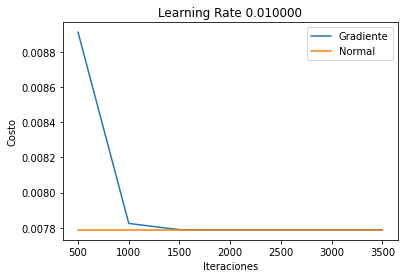

learning rate: 0.05, iteraciones:   500, costo gradiente: 0.00778755214569973320, costo normal: 0.00778755098972472738
learning rate: 0.05, iteraciones:  1000, costo gradiente: 0.00778755098972476380, costo normal: 0.00778755098972472738
learning rate: 0.05, iteraciones:  1500, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738
learning rate: 0.05, iteraciones:  2000, costo gradiente: 0.00778755098972473171, costo normal: 0.00778755098972472738
learning rate: 0.05, iteraciones:  2500, costo gradiente: 0.00778755098972473171, costo normal: 0.00778755098972472738
learning rate: 0.05, iteraciones:  3000, costo gradiente: 0.00778755098972473171, costo normal: 0.00778755098972472738
learning rate: 0.05, iteraciones:  3500, costo gradiente: 0.00778755098972473171, costo normal: 0.00778755098972472738


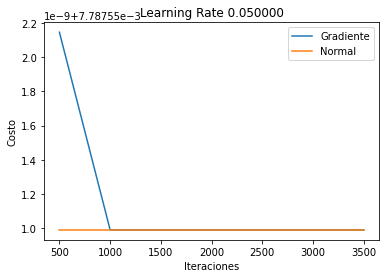

learning rate: 0.10, iteraciones:   500, costo gradiente: 0.00778755098972475947, costo normal: 0.00778755098972472738
learning rate: 0.10, iteraciones:  1000, costo gradiente: 0.00778755098972472824, costo normal: 0.00778755098972472738
learning rate: 0.10, iteraciones:  1500, costo gradiente: 0.00778755098972472824, costo normal: 0.00778755098972472738
learning rate: 0.10, iteraciones:  2000, costo gradiente: 0.00778755098972472824, costo normal: 0.00778755098972472738
learning rate: 0.10, iteraciones:  2500, costo gradiente: 0.00778755098972472824, costo normal: 0.00778755098972472738
learning rate: 0.10, iteraciones:  3000, costo gradiente: 0.00778755098972472824, costo normal: 0.00778755098972472738
learning rate: 0.10, iteraciones:  3500, costo gradiente: 0.00778755098972472824, costo normal: 0.00778755098972472738


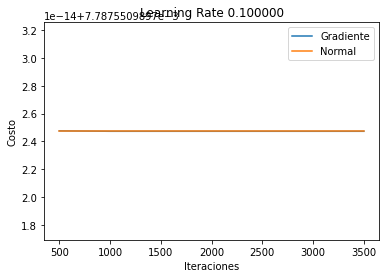

learning rate: 0.20, iteraciones:   500, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738
learning rate: 0.20, iteraciones:  1000, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738
learning rate: 0.20, iteraciones:  1500, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738
learning rate: 0.20, iteraciones:  2000, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738
learning rate: 0.20, iteraciones:  2500, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738
learning rate: 0.20, iteraciones:  3000, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738
learning rate: 0.20, iteraciones:  3500, costo gradiente: 0.00778755098972472738, costo normal: 0.00778755098972472738


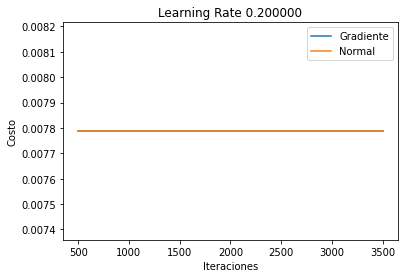

learning rate: 0.30, iteraciones:   500, costo gradiente: 0.00778755098972472998, costo normal: 0.00778755098972472738
learning rate: 0.30, iteraciones:  1000, costo gradiente: 0.00778755098972472998, costo normal: 0.00778755098972472738
learning rate: 0.30, iteraciones:  1500, costo gradiente: 0.00778755098972472998, costo normal: 0.00778755098972472738
learning rate: 0.30, iteraciones:  2000, costo gradiente: 0.00778755098972472998, costo normal: 0.00778755098972472738
learning rate: 0.30, iteraciones:  2500, costo gradiente: 0.00778755098972472998, costo normal: 0.00778755098972472738
learning rate: 0.30, iteraciones:  3000, costo gradiente: 0.00778755098972472998, costo normal: 0.00778755098972472738
learning rate: 0.30, iteraciones:  3500, costo gradiente: 0.00778755098972472998, costo normal: 0.00778755098972472738


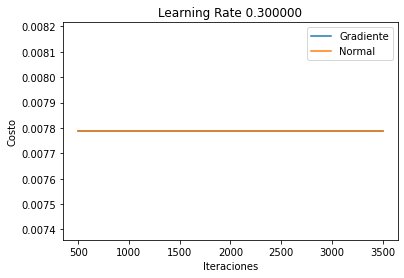

learning rate: 0.40, iteraciones:   500, costo gradiente: 0.00778755098972472564, costo normal: 0.00778755098972472738
learning rate: 0.40, iteraciones:  1000, costo gradiente: 0.00778755098972472564, costo normal: 0.00778755098972472738
learning rate: 0.40, iteraciones:  1500, costo gradiente: 0.00778755098972472564, costo normal: 0.00778755098972472738
learning rate: 0.40, iteraciones:  2000, costo gradiente: 0.00778755098972472564, costo normal: 0.00778755098972472738
learning rate: 0.40, iteraciones:  2500, costo gradiente: 0.00778755098972472564, costo normal: 0.00778755098972472738
learning rate: 0.40, iteraciones:  3000, costo gradiente: 0.00778755098972472564, costo normal: 0.00778755098972472738
learning rate: 0.40, iteraciones:  3500, costo gradiente: 0.00778755098972472564, costo normal: 0.00778755098972472738


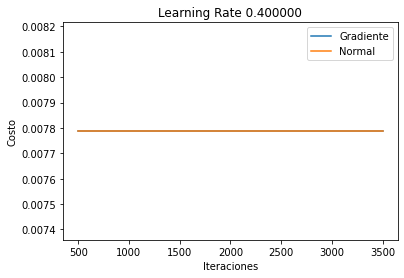

[[-0.19466768  0.72966071]]


In [717]:
tmp_theta1 = parameters(x_train_con_peru, y_train_con_peru)
print(tmp_theta1)

In [718]:
print(tmp_theta1)
print(cal_cost(x_test_con_peru, y_test_con_peru, tmp_theta1))

[[-0.19466768  0.72966071]]
0.21772381511415956


learning rate: 0.01, iteraciones:   500, costo gradiente: 0.01934193561503115555, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  1000, costo gradiente: 0.01845346661597086629, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  1500, costo gradiente: 0.01842433923464274412, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  2000, costo gradiente: 0.01842338415535602764, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  2500, costo gradiente: 0.01842335283855357775, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  3000, costo gradiente: 0.01842335181168373859, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  3500, costo gradiente: 0.01842335177801294327, costo normal: 0.01842335177687145359


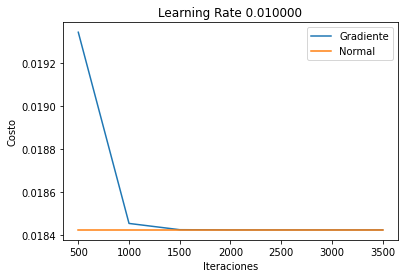

learning rate: 0.05, iteraciones:   500, costo gradiente: 0.01842335272037086066, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  1000, costo gradiente: 0.01842335177687148134, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  2000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  2500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  3000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  3500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359


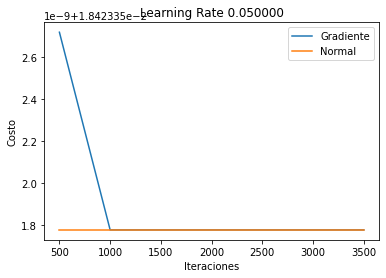

learning rate: 0.10, iteraciones:   500, costo gradiente: 0.01842335177687147788, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  1000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  2000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  2500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  3000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  3500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359


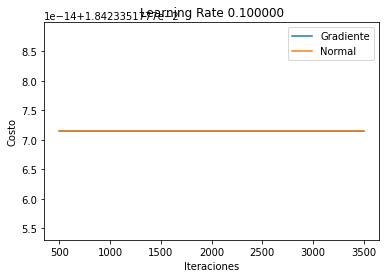

learning rate: 0.20, iteraciones:   500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  1000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  1500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  2000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  2500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  3000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  3500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359


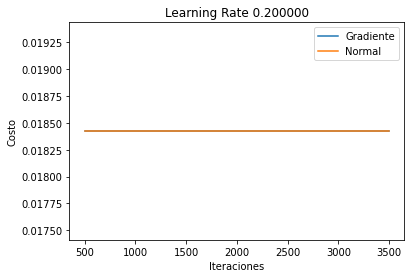

learning rate: 0.30, iteraciones:   500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  1000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  2000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  2500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  3000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  3500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359


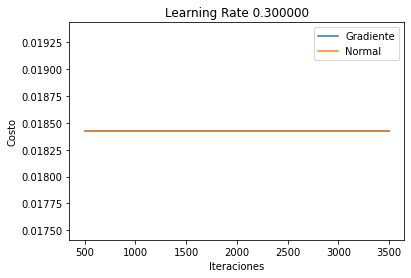

learning rate: 0.40, iteraciones:   500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  1000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  2000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  2500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  3000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  3500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359


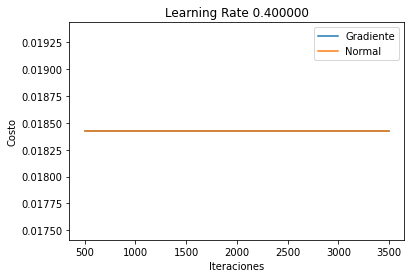

[[-0.22325381  0.69706261]]


In [719]:
tmp_theta2 = parameters(x_train_dea_peru, y_train_dea_peru)
print(tmp_theta2)

In [720]:
print(tmp_theta2)
print(cal_cost(x_test_dea_peru, y_test_dea_peru, tmp_theta2))

[[-0.22325381  0.69706261]]
0.2712780214652694


In [721]:
def original_data(data,t):
  mean = np.mean(data,0)
  stdd = np.std(data,0)
  return (t*stdd)+mean

Text(0, 0.5, 'Casos Positivos')

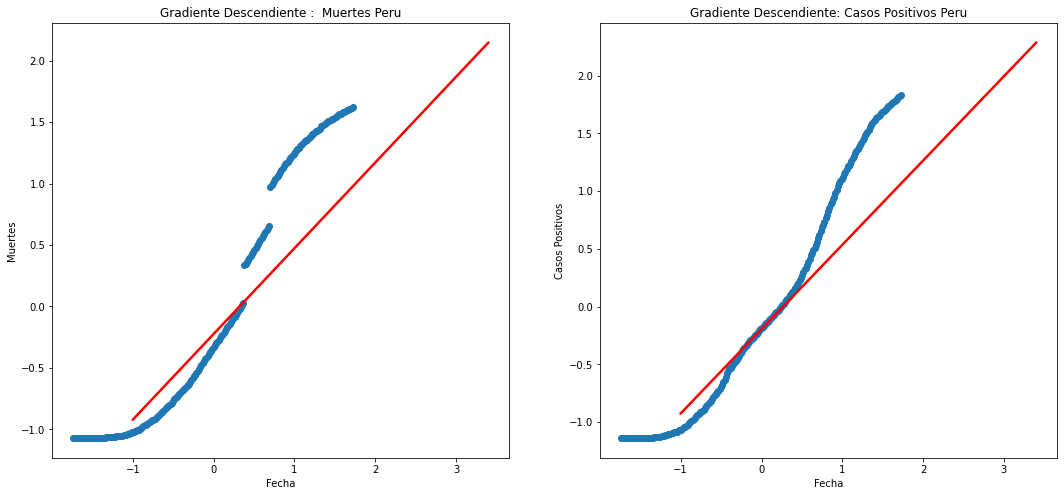

In [722]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

points2 =  np.array(peru_confirmed)
points4=  np.array(peru_deaths)

x_Home2 =np.array(peru_confirmed[:,0], dtype=np.float64)
y_Home2 =np.array(peru_confirmed[:,1], dtype=np.float64)

x_Home4 =np.array(peru_deaths[:,0], dtype=np.float64)
y_Home4 =np.array(peru_deaths[:,1], dtype=np.float64)

tmp2 = original_data(x_Home2,tmp_theta1)
tmp4 = original_data(x_Home4,tmp_theta2)

rect_U = np.arange(-1,3.5,0.1)[np.newaxis].T
rect_U = np.insert(rect_U, 0, 1, axis=1)

y2 = rect_U.dot(tmp_theta1.T)
y4 = rect_U.dot(tmp_theta2.T)
rect_p2 = original_data(x_Home2,rect_U)
rect_p4 = original_data(x_Home4,rect_U)
y2 = original_data(y_Home2,y2)
y4 = original_data(y_Home4,y4)

ax[0].scatter(points4[:,0],points4[:,1])

ax[0].plot(rect_p4[:,1],y4,'-r',linewidth=2.5)
ax[0].set_title("Gradiente Descendiente :  Muertes Peru")
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Muertes")

ax[1].scatter(points2[:,0],points2[:,1])
ax[1].plot(rect_p2[:,1],y2,'-r',linewidth=2.5)
ax[1].set_title("Gradiente Descendiente: Casos Positivos Peru")
ax[1].set_xlabel("Fecha")
ax[1].set_ylabel("Casos Positivos")



In [723]:
from scipy import optimize

def Normalizar_MinMax( data ):
  mean = np.mean(data,0)

  min = np.amin(data, axis=0) 
  max = np.amax(data, axis=0) 

  for i in range(0,data.shape[0]):
    data[i] = np.true_divide((data[i] - min), (max-min))
  return data


def original_dataMinMax(data,t):

  mean = np.mean(data,0)
  min = np.amin(data, axis=0) 
  max = np.amax(data, axis=0)

  return (t*(max-min))+min

def trat_data2(d):
  d = np.array(d, dtype=np.float64)
  d = Normalizar_MinMax(d)
  np.random.shuffle(d)
  return d


n_peru_p2 = trat_data2(peru_confirmed)
n_peru_d2 = trat_data2(peru_deaths)

tr_x_pp2, tr_y_pp2, te_x_pp2 , te_y_pp2 =  train_test(n_peru_p2)
tr_x_pd2, tr_y_pd2, te_x_pd2 , te_y_pd2 = train_test(n_peru_d2)




#print(tr_x_pp2)

pp = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_peru_p2[:,0], tr_peru_p2[:,1] )
pd = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_peru_d2[:,0], tr_peru_d2[:,1] )


print(pp[0])
print(pd[0])

#print(tr_peru_p[:,0])

def func_exp(a,b,x):
  a = np.array(a, dtype=np.float64)
  b = np.array(b, dtype=np.float64)
  print('A: ', a)
  print('B:', b)
  print('X: ',x)
  return a*np.exp(b*x)


[0.06751948 2.90737172]
[0.07211219 2.8437917 ]


A:  0.06751948270662626
B: 2.9073717181550465
X:  [[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]
 [1.1]]
A:  0.07211219069976879
B: 2.843791696376146
X:  [[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]
 [1.1]]


Text(0, 0.5, 'Casos Positivos')

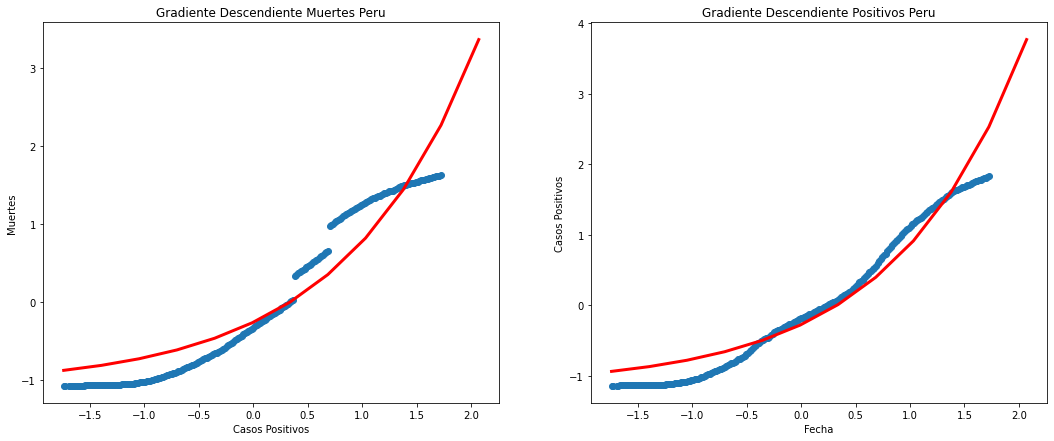

In [724]:
def MSE(Y_r, Y):
    m = len(Y)
    return np.sum((Y_r - Y)**2) / m

points2 =  np.array(peru_confirmed)
points4=  np.array(peru_deaths)

fig2, ax2 = plt.subplots(1,2,figsize=(18,7))




rect_U = np.arange(0,1.2,0.1)[np.newaxis].T
#rect_U = np.insert(rect_U, 0, 1, axis=1)

#print(rect_U)


y2 = func_exp(pp[0][0],pp[0][1],rect_U)

y4 = func_exp(pd[0][0],pd[0][1],rect_U)


rect_p2 = original_dataMinMax(x_Home2,rect_U)

rect_p4 = original_dataMinMax(x_Home4,rect_U)


y2 = original_dataMinMax(y_Home2,y2)

y4 = original_dataMinMax(y_Home4,y4)



ax2[0].scatter(points4[:,0],points4[:,1])
ax2[0].plot(rect_p4,y4,'-r',linewidth=3.0)
ax2[0].set_title("Gradiente Descendiente Muertes Peru")
ax2[0].set_xlabel("Casos Positivos")
ax2[0].set_ylabel("Muertes")


ax2[1].scatter(points2[:,0],points2[:,1])
ax2[1].plot(rect_p2,y2,'-r',linewidth=3.0)
ax2[1].set_title("Gradiente Descendiente Positivos Peru")
ax2[1].set_xlabel("Fecha")
ax2[1].set_ylabel("Casos Positivos")






## **Datos de Arequipa**

In [725]:
aqp_data = data.loc[data['region']=='Arequipa']
print(aqp_data.shape)
aqp_data.tail()

(221, 12)


,country,iso3c,region,date,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
5480,Peru,PER,Arequipa,737713,43281.0,1415.0,NaN,239537.0,196256.0,5478.0,37803.0,NaN
5507,Peru,PER,Arequipa,737714,43368.0,1418.0,NaN,241124.0,197756.0,5529.0,37839.0,NaN
5534,Peru,PER,Arequipa,737715,43434.0,1418.0,NaN,242014.0,198580.0,5536.0,37898.0,NaN
5561,Peru,PER,Arequipa,737716,43500.0,1421.0,NaN,243377.0,199877.0,5543.0,37957.0,NaN
5588,Peru,PER,Arequipa,737717,43529.0,1426.0,NaN,243787.0,200258.0,5557.0,37972.0,NaN


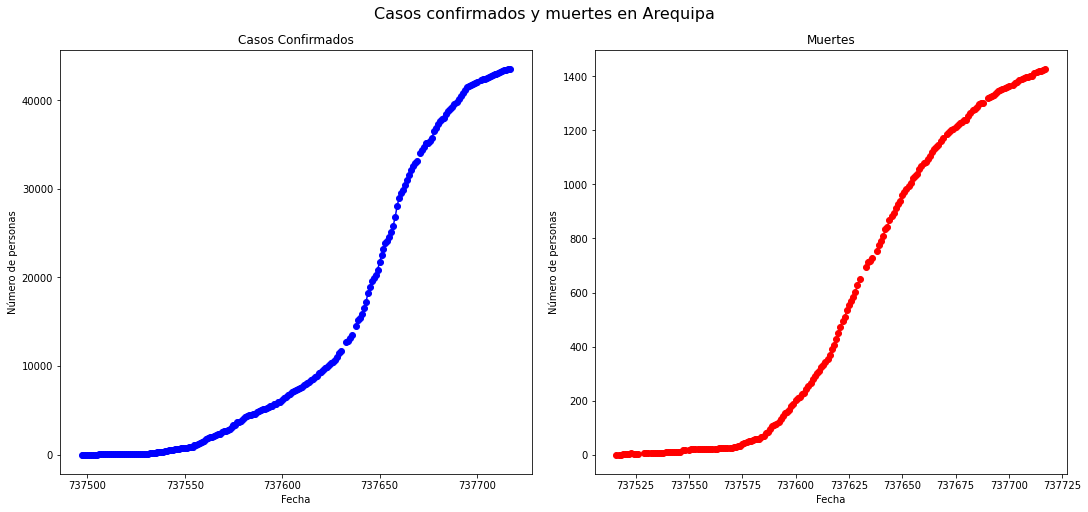

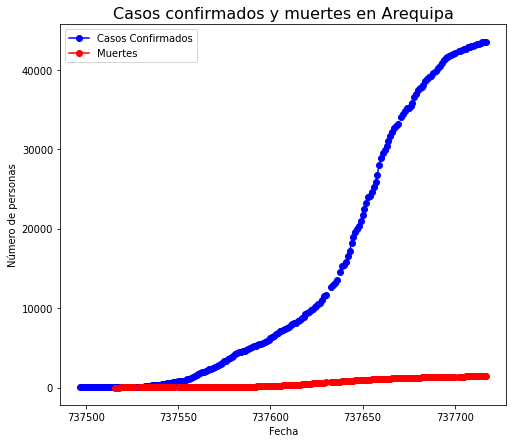

In [726]:
ax = aqp_data[['date']].to_numpy()
ay1 = aqp_data[['confirmed']].to_numpy()
ay2 = aqp_data[['deaths']].to_numpy()

plot_2('Casos confirmados y muertes en Arequipa', 'Casos Confirmados', 'Muertes', 'Fecha', 'Número de personas',ax,ay1,ay2)
plot2in1('Casos confirmados y muertes en Arequipa', 'Casos Confirmados', 'Muertes', 'Fecha', 'Número de personas',ax,ay1,ay2)

In [727]:
#print(peru_data)
aqp_deaths = aqp_data[['date', 'deaths']]
aqp_deaths = aqp_deaths.fillna(0)
aqp_confirmed = aqp_data[['date', 'confirmed']]
aqp_confirmed = aqp_confirmed.fillna(0)

print(aqp_deaths)
print(aqp_confirmed)


        date  deaths
6     737497     0.0
12    737498     0.0
19    737499     0.0
30    737500     0.0
41    737501     0.0
...      ...     ...
5480  737713  1415.0
5507  737714  1418.0
5534  737715  1418.0
5561  737716  1421.0
5588  737717  1426.0

[221 rows x 2 columns]
        date  confirmed
6     737497        2.0
12    737498        2.0
19    737499        2.0
30    737500        2.0
41    737501        2.0
...      ...        ...
5480  737713    43281.0
5507  737714    43368.0
5534  737715    43434.0
5561  737716    43500.0
5588  737717    43529.0

[221 rows x 2 columns]


In [728]:
aqp_confirmed = np.array(aqp_confirmed, dtype=np.float64)
aqp_deaths = np.array(aqp_deaths, dtype=np.float64)

aqp_confirmed = normalize(aqp_confirmed)
aqp_deaths = normalize(aqp_deaths)

print(aqp_deaths)

[[-1.72423113e+00 -9.16466916e-01]
 [-1.70855630e+00 -9.16466916e-01]
 [-1.69288147e+00 -9.16466916e-01]
 [-1.67720664e+00 -9.16466916e-01]
 [-1.66153181e+00 -9.16466916e-01]
 [-1.64585698e+00 -9.16466916e-01]
 [-1.63018215e+00 -9.16466916e-01]
 [-1.61450733e+00 -9.16466916e-01]
 [-1.59883250e+00 -9.16466916e-01]
 [-1.58315767e+00 -9.16466916e-01]
 [-1.56748284e+00 -9.16466916e-01]
 [-1.55180801e+00 -9.16466916e-01]
 [-1.53613318e+00 -9.16466916e-01]
 [-1.52045836e+00 -9.16466916e-01]
 [-1.50478353e+00 -9.16466916e-01]
 [-1.48910870e+00 -9.16466916e-01]
 [-1.47343387e+00 -9.16466916e-01]
 [-1.45775904e+00 -9.16466916e-01]
 [-1.44208421e+00 -9.16466916e-01]
 [-1.42640939e+00 -9.14612705e-01]
 [-1.41073456e+00 -9.14612705e-01]
 [-1.39505973e+00 -9.14612705e-01]
 [-1.37938490e+00 -9.12758494e-01]
 [-1.36371007e+00 -9.10904282e-01]
 [-1.34803524e+00 -9.09050071e-01]
 [-1.33236041e+00 -9.09050071e-01]
 [-1.31668559e+00 -9.07195860e-01]
 [-1.30101076e+00 -9.09050071e-01]
 [-1.28533593e+00 -9

In [729]:
x_train_con_aqp, y_train_con_aqp, x_test_con_aqp, y_test_con_aqp = train_test(aqp_confirmed)
x_train_dea_aqp, y_train_dea_aqp,  x_test_dea_aqp, y_test_dea_aqp = train_test(aqp_deaths)

print(y_train_con_aqp.shape)
print(x_test_con_aqp.shape)
print(y_test_con_aqp.shape) 
print(x_train_dea_aqp.shape)
print(y_train_dea_aqp.shape)
print(x_test_dea_aqp.shape)
print(y_test_dea_aqp.shape)

(154, 1)
(67, 1)
(67, 1)
(154, 1)
(154, 1)
(67, 1)
(67, 1)


In [730]:
x_train_con_aqp = add_ones(x_train_con_aqp)
x_test_con_aqp = add_ones(x_test_con_aqp)



print(x_train_con_pe.shape)
print(x_test_con_pe.shape)

x_train_dea_aqp = add_ones(x_train_dea_aqp)
x_test_dea_aqp = add_ones(x_test_dea_aqp)

print(x_train_dea_aqp.shape)
print(x_test_dea_aqp.shape)

(158, 2)
(68, 2)
(154, 2)
(67, 2)


In [731]:
theta_con_aqp = theta(x_train_con_aqp.shape[1])
theta_dea_aqp  = theta(x_train_dea_aqp.shape[1])

learning rate: 0.01, iteraciones:   500, costo gradiente: 0.01555164119185946381, costo normal: 0.01547657142626067232
learning rate: 0.01, iteraciones:  1000, costo gradiente: 0.01547900469908138933, costo normal: 0.01547657142626067232
learning rate: 0.01, iteraciones:  1500, costo gradiente: 0.01547665043870744862, costo normal: 0.01547657142626067232
learning rate: 0.01, iteraciones:  2000, costo gradiente: 0.01547657399192733582, costo normal: 0.01547657142626067232
learning rate: 0.01, iteraciones:  2500, costo gradiente: 0.01547657150957217065, costo normal: 0.01547657142626067232
learning rate: 0.01, iteraciones:  3000, costo gradiente: 0.01547657142896593715, costo normal: 0.01547657142626067232
learning rate: 0.01, iteraciones:  3500, costo gradiente: 0.01547657142634851872, costo normal: 0.01547657142626067232


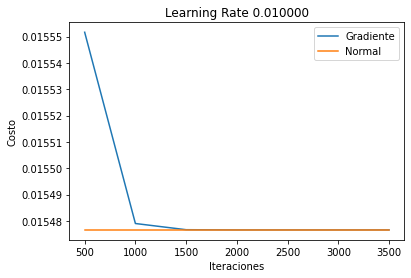

learning rate: 0.05, iteraciones:   500, costo gradiente: 0.01547657150024807360, costo normal: 0.01547657142626067232
learning rate: 0.05, iteraciones:  1000, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.05, iteraciones:  1500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.05, iteraciones:  2000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.05, iteraciones:  2500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.05, iteraciones:  3000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.05, iteraciones:  3500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232


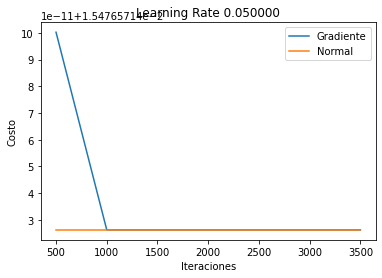

learning rate: 0.10, iteraciones:   500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.10, iteraciones:  1000, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.10, iteraciones:  1500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.10, iteraciones:  2000, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.10, iteraciones:  2500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.10, iteraciones:  3000, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.10, iteraciones:  3500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232


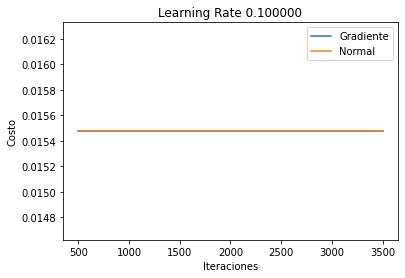

learning rate: 0.20, iteraciones:   500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.20, iteraciones:  1000, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.20, iteraciones:  1500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.20, iteraciones:  2000, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.20, iteraciones:  2500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.20, iteraciones:  3000, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232
learning rate: 0.20, iteraciones:  3500, costo gradiente: 0.01547657142626067579, costo normal: 0.01547657142626067232


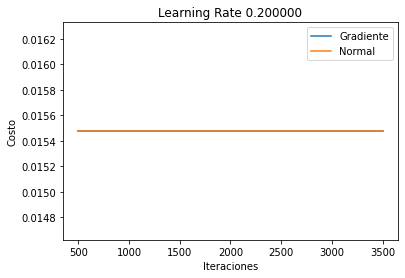

learning rate: 0.30, iteraciones:   500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.30, iteraciones:  1000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.30, iteraciones:  1500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.30, iteraciones:  2000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.30, iteraciones:  2500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.30, iteraciones:  3000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.30, iteraciones:  3500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232


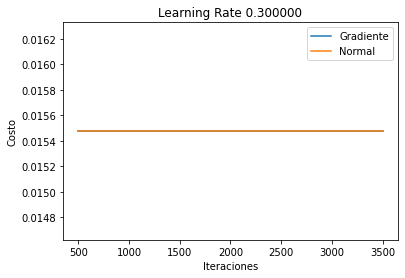

learning rate: 0.40, iteraciones:   500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.40, iteraciones:  1000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.40, iteraciones:  1500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.40, iteraciones:  2000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.40, iteraciones:  2500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.40, iteraciones:  3000, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232
learning rate: 0.40, iteraciones:  3500, costo gradiente: 0.01547657142626067232, costo normal: 0.01547657142626067232


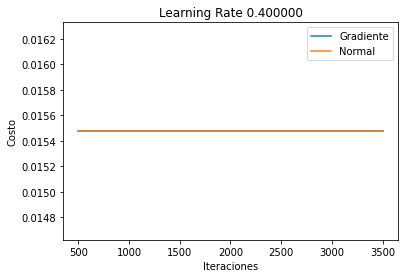

[[-0.35964876  0.435686  ]]


In [732]:
aqp_theta1 = parameters(x_train_con_aqp, y_train_con_aqp)
print(aqp_theta1)

learning rate: 0.01, iteraciones:   500, costo gradiente: 0.01934193561503115555, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  1000, costo gradiente: 0.01845346661597086629, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  1500, costo gradiente: 0.01842433923464274412, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  2000, costo gradiente: 0.01842338415535602764, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  2500, costo gradiente: 0.01842335283855357775, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  3000, costo gradiente: 0.01842335181168373859, costo normal: 0.01842335177687145359
learning rate: 0.01, iteraciones:  3500, costo gradiente: 0.01842335177801294327, costo normal: 0.01842335177687145359


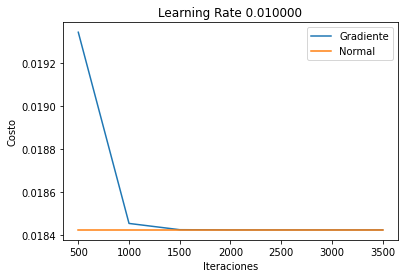

learning rate: 0.05, iteraciones:   500, costo gradiente: 0.01842335272037086066, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  1000, costo gradiente: 0.01842335177687148134, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  2000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  2500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  3000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.05, iteraciones:  3500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359


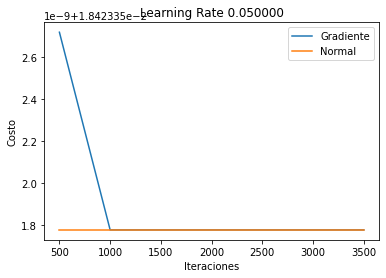

learning rate: 0.10, iteraciones:   500, costo gradiente: 0.01842335177687147788, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  1000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  2000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  2500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  3000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.10, iteraciones:  3500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359


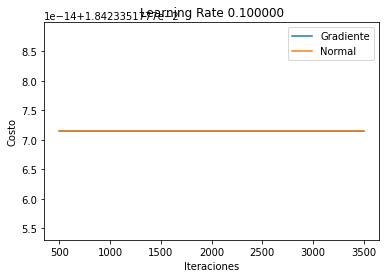

learning rate: 0.20, iteraciones:   500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  1000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  1500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  2000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  2500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  3000, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359
learning rate: 0.20, iteraciones:  3500, costo gradiente: 0.01842335177687145706, costo normal: 0.01842335177687145359


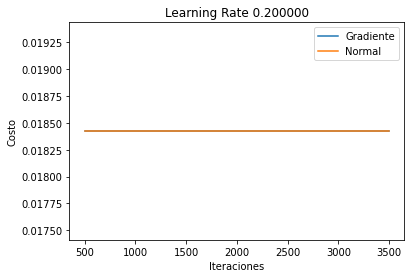

learning rate: 0.30, iteraciones:   500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  1000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  2000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  2500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  3000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.30, iteraciones:  3500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359


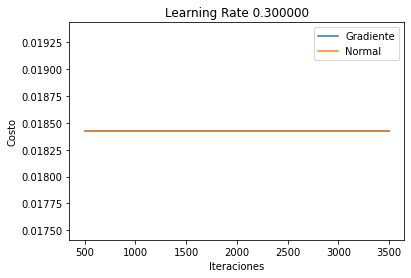

learning rate: 0.40, iteraciones:   500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  1000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  1500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  2000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  2500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  3000, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359
learning rate: 0.40, iteraciones:  3500, costo gradiente: 0.01842335177687145359, costo normal: 0.01842335177687145359


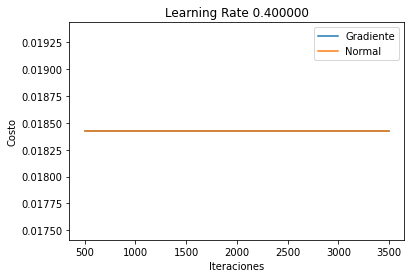

[[-0.22325381  0.69706261]]


In [733]:
aqp_theta2 = parameters(x_train_dea_peru, y_train_dea_peru)
print(aqp_theta2)

Text(0, 0.5, 'Casos Positivos')

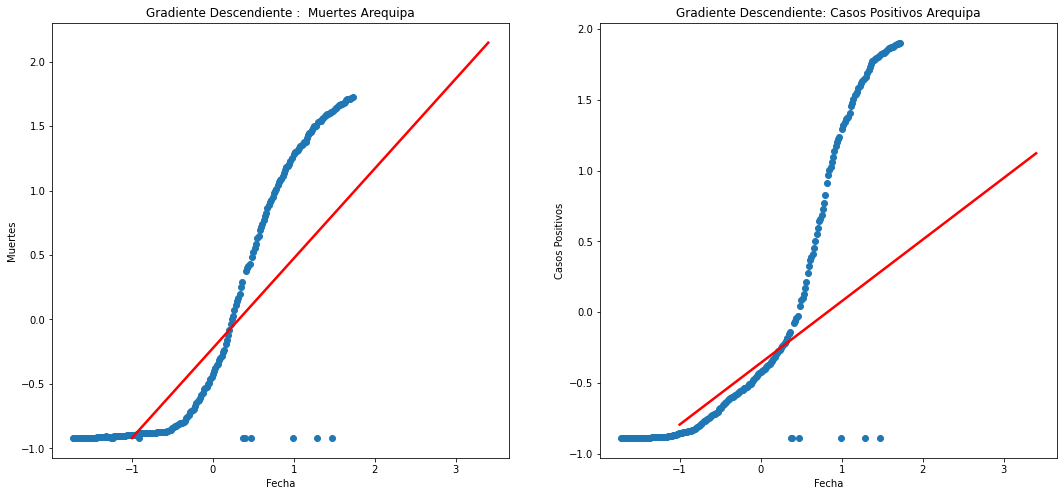

In [734]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

points2 =  np.array(aqp_confirmed)
points4=  np.array(aqp_deaths)

x_Home2 =np.array(aqp_confirmed[:,0], dtype=np.float64)
y_Home2 =np.array(aqp_confirmed[:,1], dtype=np.float64)

x_Home4 =np.array(aqp_deaths[:,0], dtype=np.float64)
y_Home4 =np.array(aqp_deaths[:,1], dtype=np.float64)

tmp2 = original_data(x_Home2,aqp_theta1)
tmp4 = original_data(x_Home4,aqp_theta2)

rect_U = np.arange(-1,3.5,0.1)[np.newaxis].T
rect_U = np.insert(rect_U, 0, 1, axis=1)

y2 = rect_U.dot(aqp_theta1.T)
y4 = rect_U.dot(aqp_theta2.T)
rect_p2 = original_data(x_Home2,rect_U)
rect_p4 = original_data(x_Home4,rect_U)
y2 = original_data(y_Home2,y2)
y4 = original_data(y_Home4,y4)

ax[0].scatter(points4[:,0],points4[:,1])

ax[0].plot(rect_p4[:,1],y4,'-r',linewidth=2.5)
ax[0].set_title("Gradiente Descendiente :  Muertes Arequipa")
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Muertes")

ax[1].scatter(points2[:,0],points2[:,1])
ax[1].plot(rect_p2[:,1],y2,'-r',linewidth=2.5)
ax[1].set_title("Gradiente Descendiente: Casos Positivos Arequipa")
ax[1].set_xlabel("Fecha")
ax[1].set_ylabel("Casos Positivos")

In [738]:
n_peru_p2 = trat_data2(peru_confirmed)
n_peru_d2 = trat_data2(peru_deaths)

tr_x_pp2, tr_y_pp2, te_x_pp2 , te_y_pp2 =  train_test(n_peru_p2)
tr_x_pd2, tr_y_pd2, te_x_pd2 , te_y_pd2 = train_test(n_peru_d2)


#print(tr_x_pp2)

pp = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_peru_p2[:,0], tr_peru_p2[:,1] )
pd = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_peru_d2[:,0], tr_peru_d2[:,1] )


print(pp[0])
print(pd[0])

#print(tr_peru_p[:,0])

def func_exp(a,b,x):
  a = np.array(a, dtype=np.float64)
  b = np.array(b, dtype=np.float64)
  print('A: ', a)
  print('B:', b)
  print('X: ',x)
  return a*np.exp(b*x)

[0.06751948 2.90737172]
[0.07211219 2.8437917 ]


A:  0.06751948270662626
B: 2.9073717181550465
X:  [[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]
 [1.1]]
A:  0.07211219069976879
B: 2.843791696376146
X:  [[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]
 [1.1]]


Text(0, 0.5, 'Casos Positivos')

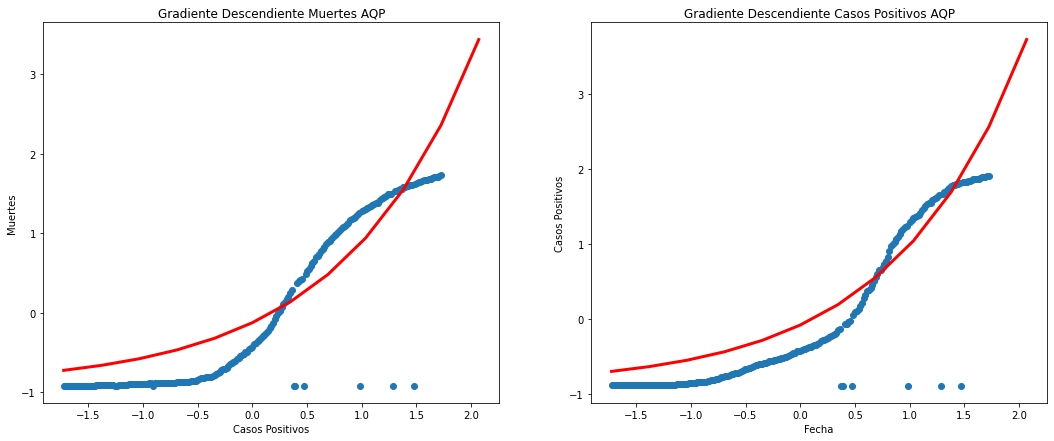

In [739]:
points2 =  np.array(aqp_confirmed)
points4=  np.array(aqp_deaths)

fig2, ax2 = plt.subplots(1,2,figsize=(18,7))


rect_U = np.arange(0,1.2,0.1)[np.newaxis].T
#rect_U = np.insert(rect_U, 0, 1, axis=1)

#print(rect_U)


y2 = func_exp(pp[0][0],pp[0][1],rect_U)
y4 = func_exp(pd[0][0],pd[0][1],rect_U)


rect_p2 = original_dataMinMax(x_Home2,rect_U)
rect_p4 = original_dataMinMax(x_Home4,rect_U)


y2 = original_dataMinMax(y_Home2,y2)
y4 = original_dataMinMax(y_Home4,y4)



ax2[0].scatter(points4[:,0],points4[:,1])
ax2[0].plot(rect_p4,y4,'-r',linewidth=3.0)
ax2[0].set_title("Gradiente Descendiente Muertes AQP")
ax2[0].set_xlabel("Casos Positivos")
ax2[0].set_ylabel("Muertes")


ax2[1].scatter(points2[:,0],points2[:,1])
ax2[1].plot(rect_p2,y2,'-r',linewidth=3.0)
ax2[1].set_title("Gradiente Descendiente Casos Positivos AQP")
ax2[1].set_xlabel("Fecha")
ax2[1].set_ylabel("Casos Positivos")